In [17]:
import pandas as pd
import os
import seaborn as sns
import ipywidgets
from sklearn import decomposition
import altair as alt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import plot_confusion_matrix
from pathlib import Path
import os
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [18]:
p = pd.read_csv('/global/cfs/cdirs/kbase/KE-Catboost/HK/Deepmicrobes/p-r.csv')


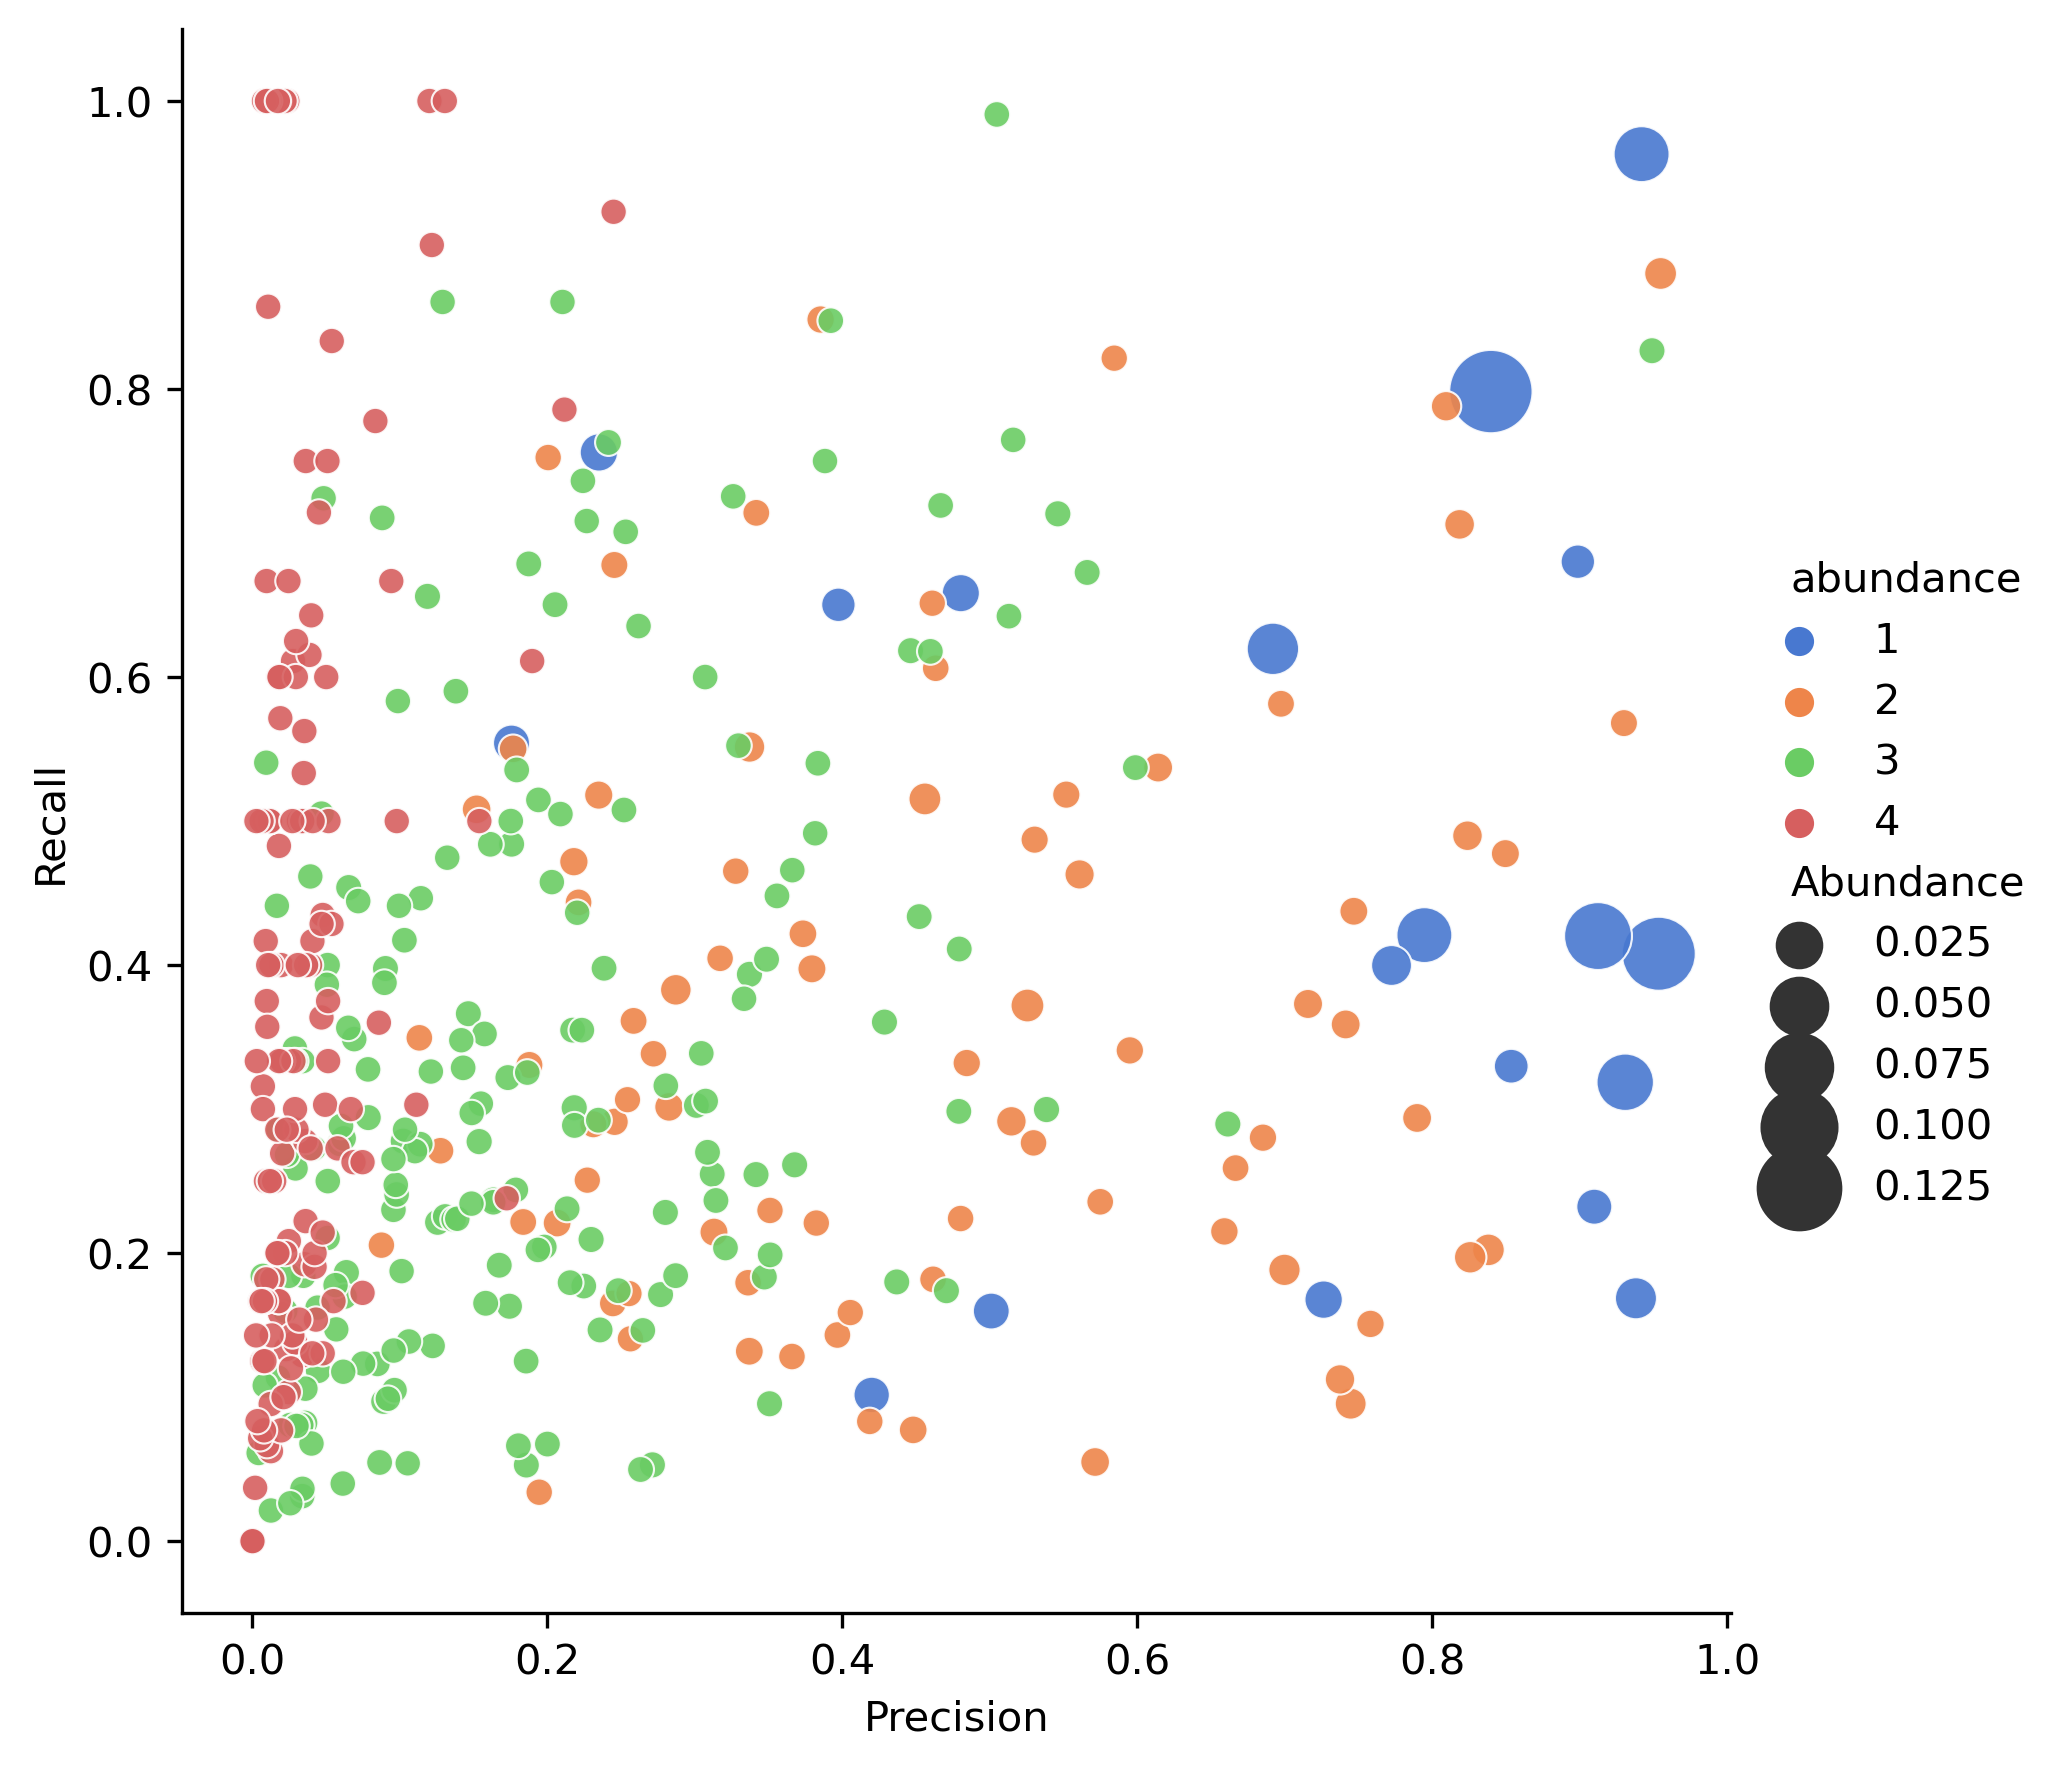

In [7]:
sns.relplot(x="Precision", y="Recall", hue="abundance", 
            size="Abundance",
            sizes=(40, 400), alpha=.9, 
            palette="muted",
            height=6, data=p)

In [19]:
pv = pd.read_csv('/global/cfs/cdirs/kbase/KE-Catboost/HK/Deepmicrobes/length_number_species.csv')
pv

,Grand Total,genus,Accuracy,Av_length,Av_GC,count,log_count,Expected_coverage
0,138,Moorea,0.333333,9546711,46.960000,2,0.301030,0.206167
1,1,Haliangium,1.000000,9446315,41.645000,1,0.000000,0.208105
2,781,Amycolatopsis,0.112676,9121443,40.013333,1,0.000000,0.214520
3,13,Myxococcus,0.307692,9003594,70.147500,1,0.000000,0.216887
4,125,Rivularia,0.272000,8728774,67.610000,2,0.301030,0.250760
...,...,...,...,...,...,...,...,...
350,37,Aciduliprofundum,0.783784,1461935,57.830000,2,0.301030,0.776996
351,4428,Weissella,0.939928,1378589,47.610000,3,0.477121,0.797046
352,170,Ignicoccus,0.823529,1346102,50.720000,2,0.301030,0.805358
353,105,Neorickettsia,0.733333,884233,63.830000,1,0.000000,0.918123


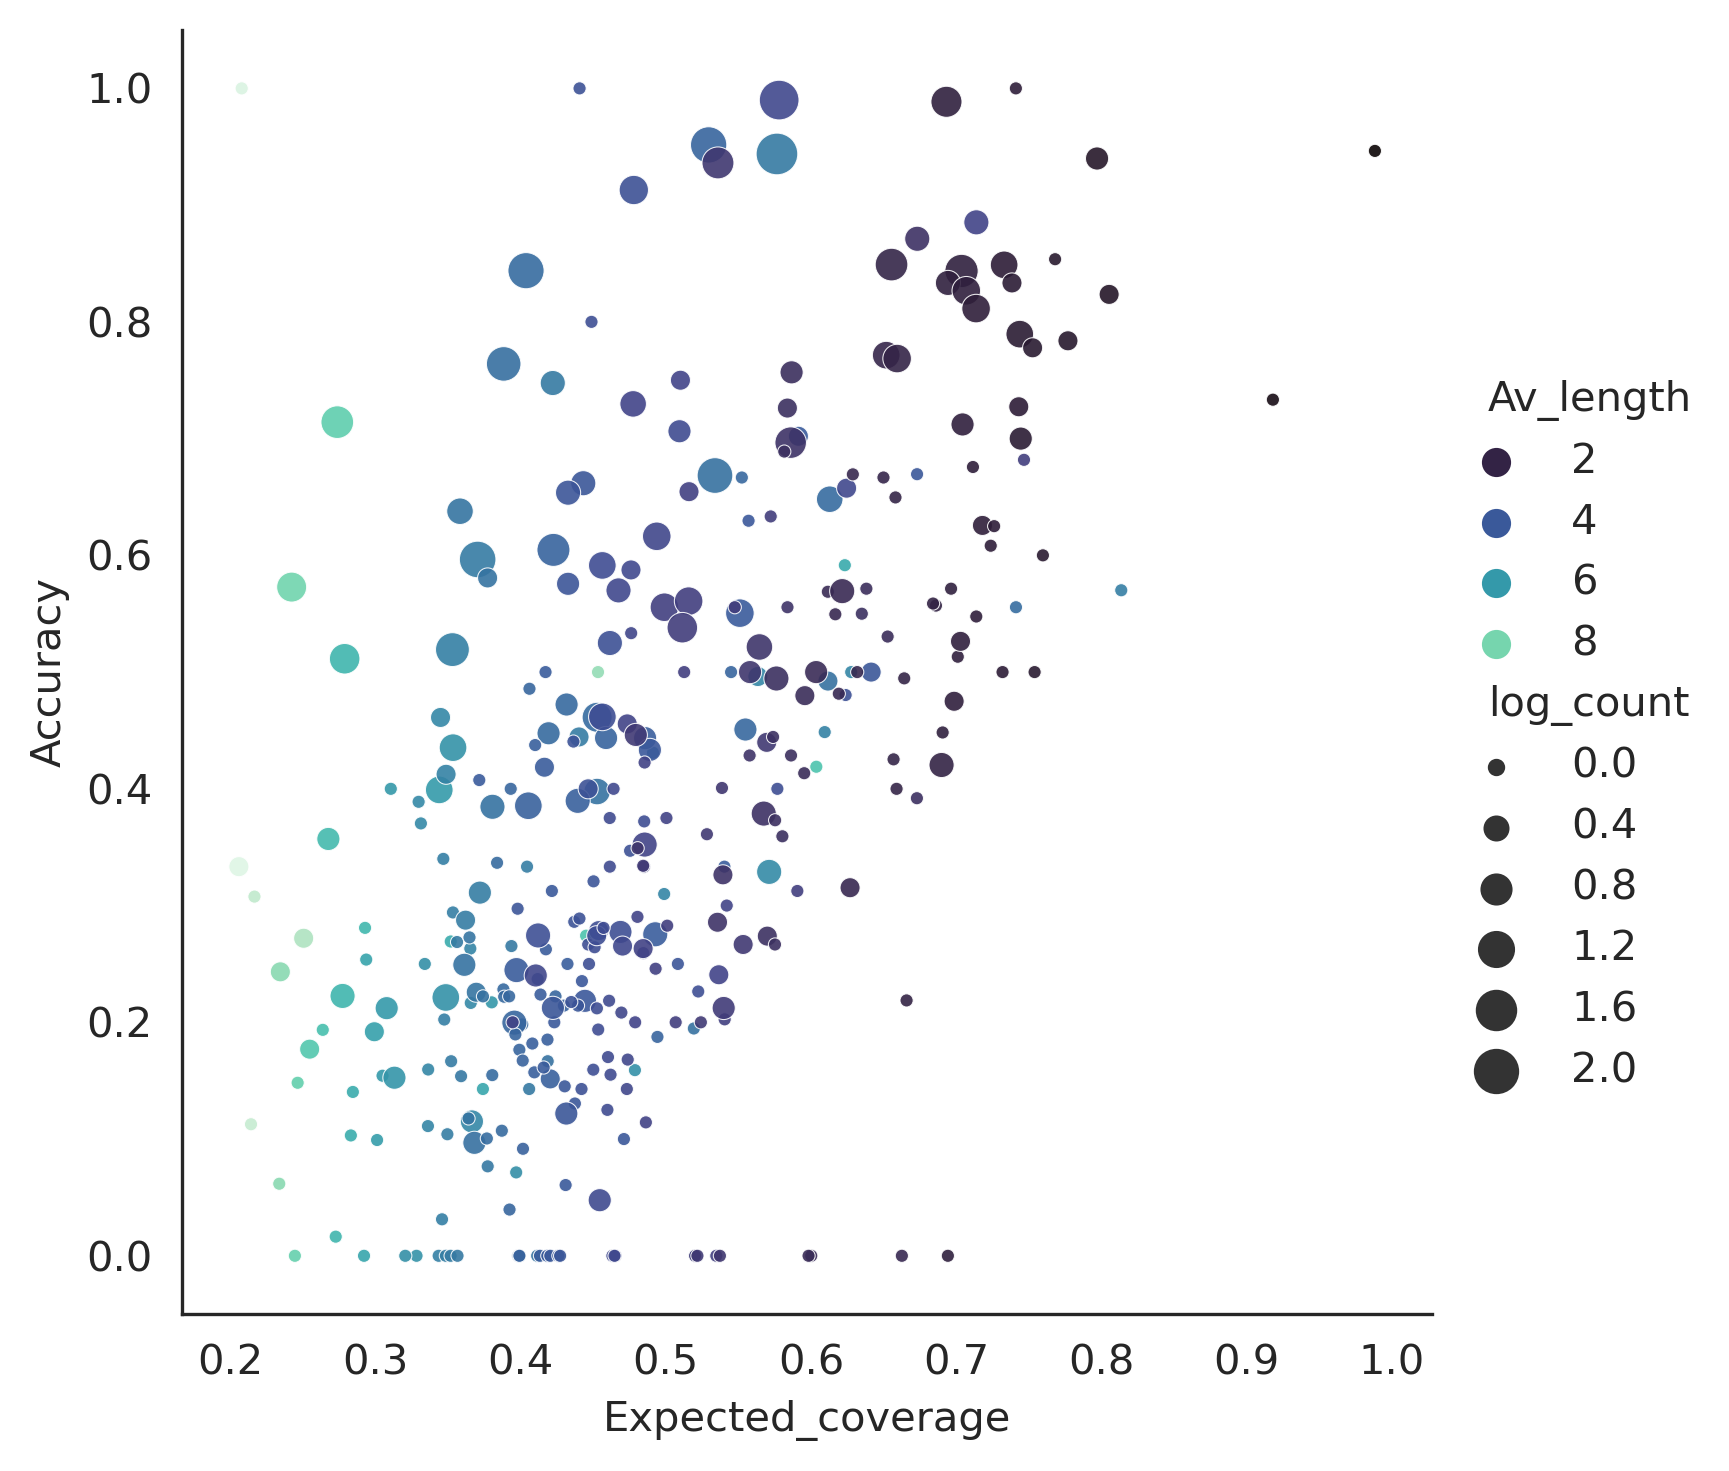

In [21]:
plt.rcParams['figure.dpi'] = 300
sns.set_style("white")
sns.relplot(x="Expected_coverage", y="Accuracy", hue="Av_length", 
            size="log_count", palette='mako',
            sizes=(10, 100), alpha=.9, 
           # height=4, 
            data=pv) #coverage

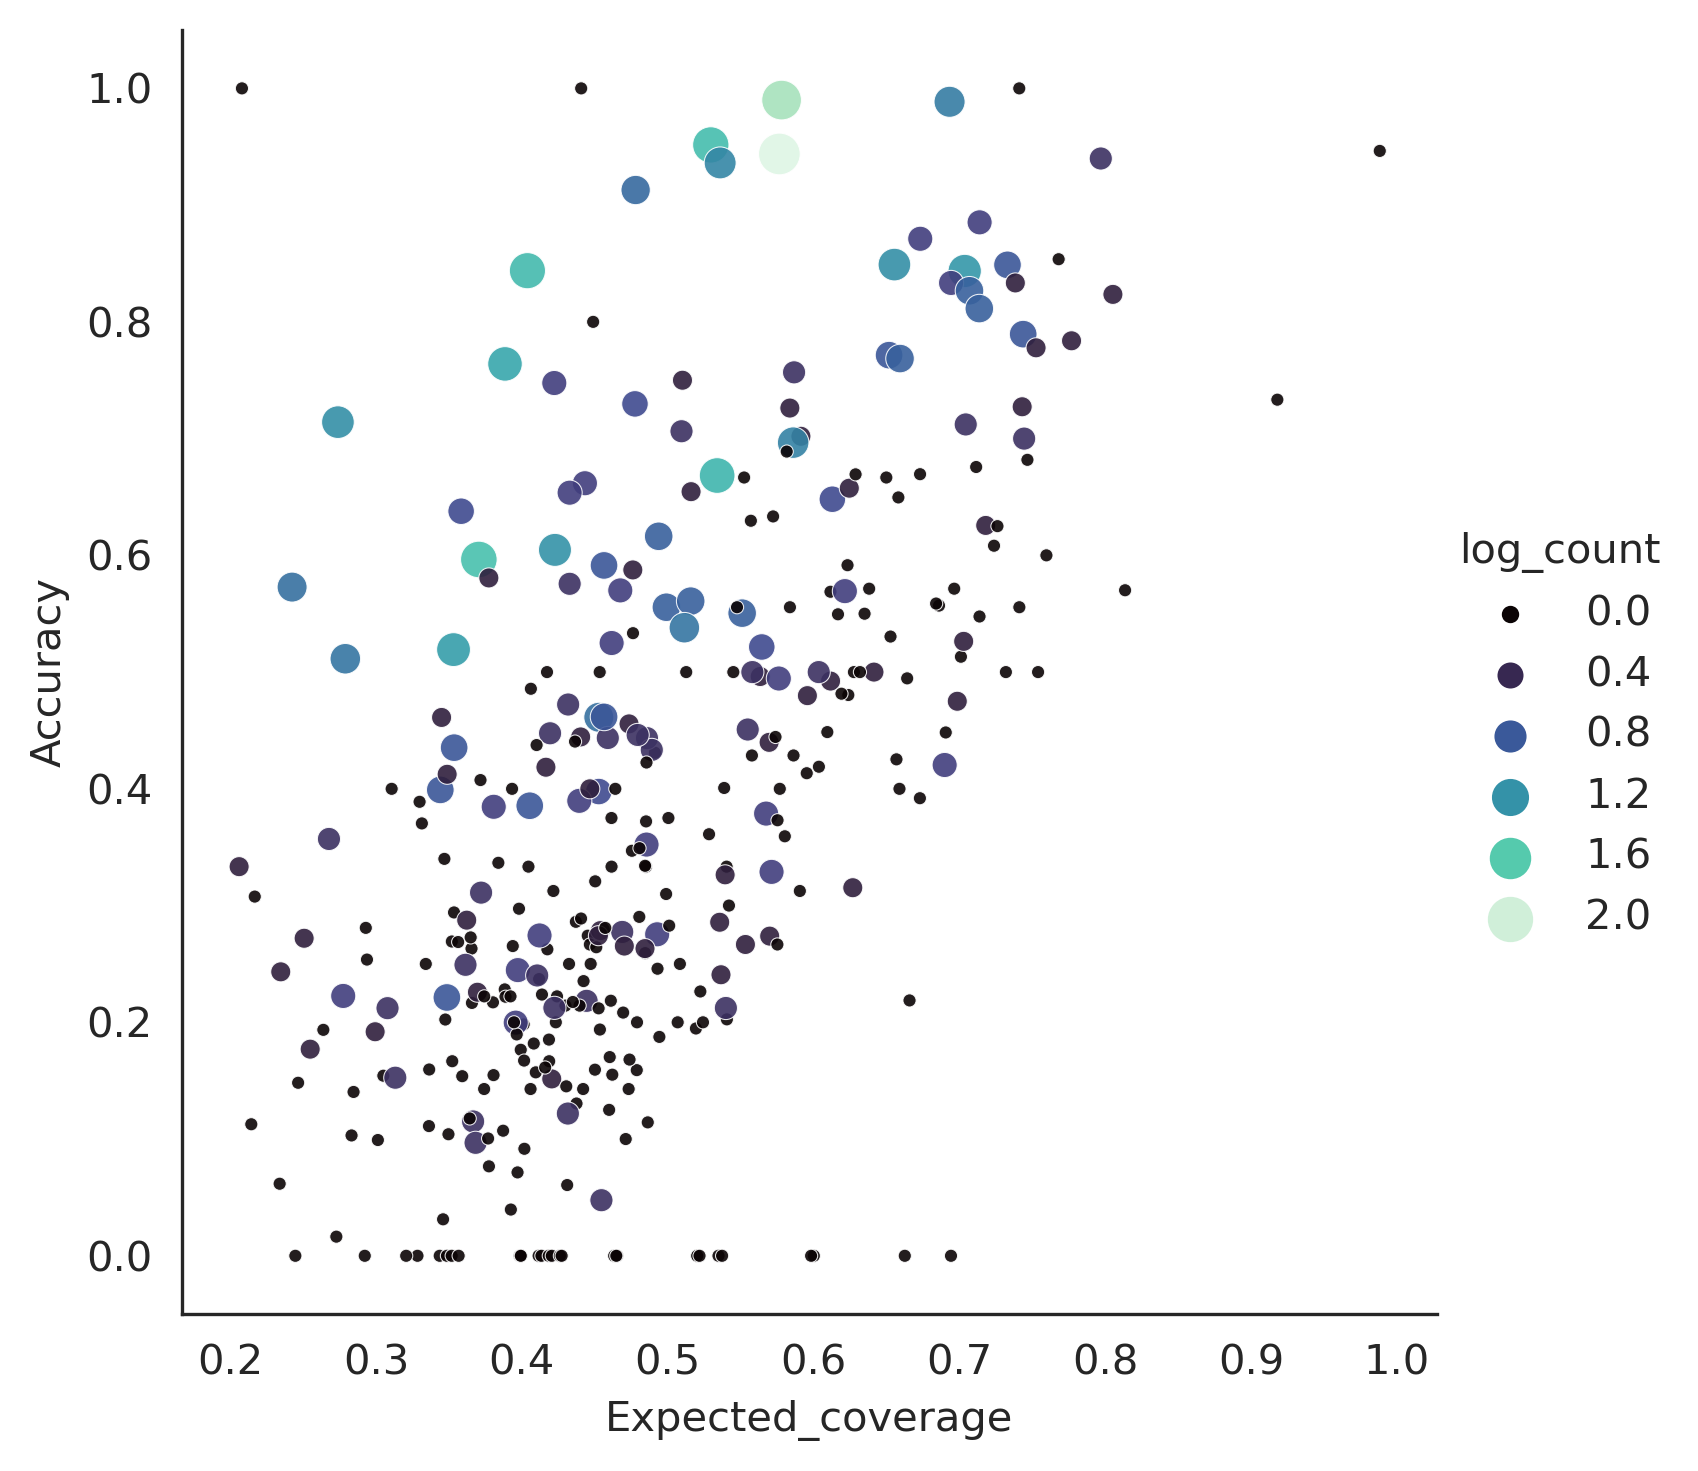

In [22]:
plt.rcParams['figure.dpi'] = 300
sns.set_style("white")
sns.relplot(x="Expected_coverage", y="Accuracy", hue="log_count", 
            size="log_count", palette='mako',
            sizes=(10, 100), alpha=.9, 
           # height=4, 
            data=pv) #coverage

In [29]:
b = pd.read_csv('/global/cfs/cdirs/kbase/KE-Catboost/HK/Deepmicrobes/anonymous_results_2genus.summarizeprofile_30_.txt', 
               delimiter='\t',header=None)

b.columns = ['genus','abundance', 'threshold']

,0,1
0,Pseudoalteromonas,36454
1,Phaeobacter,16783
2,Vibrio,12253
3,Photobacterium,12010
4,Alteromonas,10193
...,...,...
509,Teredinibacter,4
510,Paraoerskovia,4
511,Agarilytica,1
512,Marivirga,1


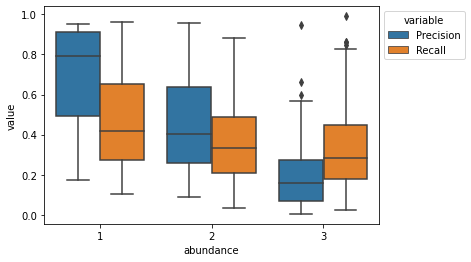

In [13]:
melted = pd.melt(p, id_vars=['abundance'], value_vars=['Precision', 'Recall'])
ax = sns.boxplot(data=melted[melted.abundance<4], x="abundance", y='value', hue='variable')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [96]:
catboost_matrix = pd.DataFrame()
main_dir = '/global/cfs/cdirs/kbase/KE-Catboost/HK/Deepmicrobes/'
parent_list = os.listdir(main_dir)
for child in parent_list:
    if 'anonymous_results_2' in child:
        metagenome = pd.read_csv(os.path.join(main_dir,child), delimiter='\t',header=None)
        child = child.replace('anonymous_results_2genus.summarizeprofile_','')
        child = child.replace('_.txt','')
        
        metagenome['abundance'] = child
        metagenome.columns = ['genus','abundance', 'threshold']
        catboost_matrix = pd.concat([catboost_matrix, metagenome])

In [97]:
catboost_matrix.genus = catboost_matrix.genus.str.replace('_A', '')
catboost_matrix.genus = catboost_matrix.genus.str.replace('_B', '')
catboost_matrix.genus = catboost_matrix.genus.str.replace('_G', '')
catboost_matrix.genus = catboost_matrix.genus.str.replace('_D', '')
catboost_matrix.genus = catboost_matrix.genus.str.replace('_O', '')
catboost_matrix.genus = catboost_matrix.genus.str.replace('_C', '')
catboost_matrix.genus = catboost_matrix.genus.str.replace('_E', '')
catboost_matrix.genus = catboost_matrix.genus.str.replace('_M', '')


In [98]:
p['genus'] = p.Species
catboost_matrix = catboost_matrix.merge(p[['genus','Abundance']], on='genus', how='left')
catboost_matrix = catboost_matrix.sort_values('threshold')
catboost_matrix = catboost_matrix.reset_index(drop=True)
catboost_matrix.to_csv('genus_2_condence_.csv')
catboost_matrix

,genus,abundance,threshold,Abundance
0,Carnobacterium,284,0,0.000958
1,Aciduliprofundum,299,0,0.000273
2,UBA11363,295,0,0.000036
3,Thalassospira,290,0,0.000132
4,Flaviramulus,288,0,0.000132
...,...,...,...,...
8982,Sulfurimonas,11,95,0.000549
8983,Ilyobacter,12,95,0.000411
8984,Marinomonas,12,95,0.013866
8985,Limnothrix,10,95,0.000174


In [94]:
microbe_list = p.Species
microbe_list

0      Pseudoalteromonas
1         Photobacterium
2          Erythrobacter
3                 Moorea
4            Phaeobacter
             ...        
447              Hoeflea
448     Coraliomargarita
449        Marinithermus
450             IMCC9063
451       Rhodophyticola
Name: Species, Length: 452, dtype: object

In [ ]:
for name in microbe_list:
    print(name)

In [42]:
catboost_matrix = catboost_matrix.sort_values('threshold')
catboost_matrix = catboost_matrix.reset_index(drop=True)
catboost_matrix.to_csv('genus_2_condence.csv')

In [132]:
matrix = pd.read_csv('genus_2_condence_.csv')


In [133]:
matrix

,genus,abundance,threshold,Abundance,sum,pred_abundance,TP,FN,FP,TN,TPR,FPR,Precision,Recall,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,Carnobacterium,284,0,0.000958,333120,0.000853,284.000000,35.000043,0.000000,332801.00000,0.89028,0.00000,1.000000,0.890282,NaN,NaN,NaN,NaN
1,Aciduliprofundum,299,0,0.000273,333120,0.000898,91.000056,0.000000,207.999944,332821.00000,1.00000,0.00062,0.304348,1.000000,NaN,NaN,NaN,NaN
2,UBA11363,295,0,0.000036,333120,0.000886,12.000015,0.000000,282.999985,332825.00000,1.00000,0.00085,0.040678,1.000000,NaN,NaN,NaN,NaN
3,Thalassospira,290,0,0.000132,333120,0.000871,44.000155,0.000000,245.999845,332830.00000,1.00000,0.00074,0.151725,1.000000,NaN,NaN,NaN,NaN
4,Flaviramulus,288,0,0.000132,333120,0.000865,44.000155,0.000000,243.999845,332832.00000,1.00000,0.00073,0.152778,1.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8982,Sulfurimonas,11,95,0.000549,30267,0.000363,11.000000,5.627237,0.000000,30250.37276,0.66157,0.00000,1.000000,0.661565,NaN,NaN,NaN,NaN
8983,Ilyobacter,12,95,0.000411,30267,0.000396,12.000000,0.447697,0.000000,30254.55230,0.96403,0.00000,1.000000,0.964034,NaN,NaN,NaN,NaN
8984,Marinomonas,12,95,0.013866,30267,0.000396,12.000000,407.678408,0.000000,29847.32159,0.02859,0.00000,1.000000,0.028593,NaN,NaN,NaN,NaN
8985,Limnothrix,10,95,0.000174,30267,0.000330,5.269818,0.000000,4.730182,30257.00000,1.00000,0.00016,0.526982,1.000000,NaN,NaN,NaN,NaN


In [ ]:
sns.relplot(x="TPR", y="FPR", 
           # hue="abundance",  size="Abundance",
           ## sizes=(40, 400), alpha=.9, 
            palette="muted",
            height=6, data=matrix)

In [107]:
#melt = matrix.melt
melt = pd.melt(matrix, id_vars=['threshold'], value_vars=['TPR','FPR'])

In [126]:
groupby = matrix[['threshold','FPR','TPR']].groupby('threshold').mean()
groupby

,FPR,TPR
threshold,,
0,0.000614,0.821171
5,0.000613,0.820842
10,0.000600,0.817681
15,0.000586,0.808528
20,0.000583,0.793408
25,0.000590,0.773347
30,0.000606,0.751337
35,0.000624,0.724250
40,0.000651,0.686464


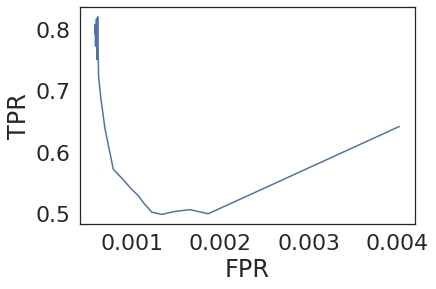

In [128]:
ax1 = sns.set_style(style="white", rc=None )
#fig, ax1 = plt.subplots(figsize=(8,8))
sns.lineplot(
    data=groupby,x="FPR", y="TPR", ax=ax1)
sns.set(font_scale=2)


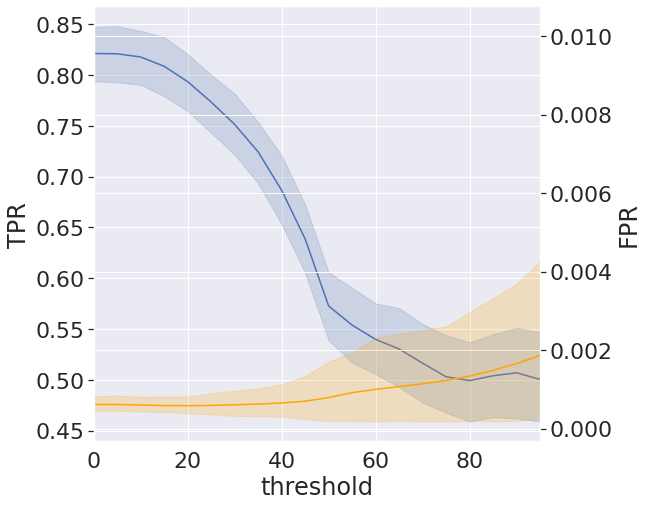

In [134]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(8,8))
sns.lineplot(
    data=matrix,x="threshold", y="TPR", ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(
    data=matrix,x="threshold", y="FPR", ax=ax2, color='orange')
ax1.set_xlim(0, 95)
ax2.set_xlim(0, 95)
sns.set(font_scale=2)
#sns.set_style("white")

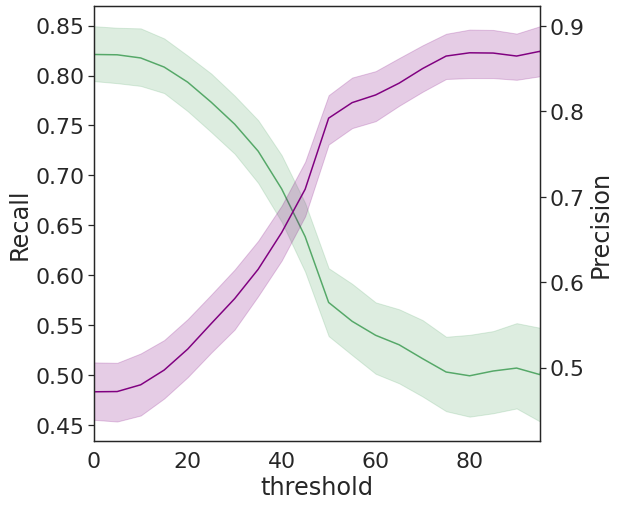

In [124]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(8,8))
sns.lineplot(
    data=matrix,x="threshold", y="Recall", ax=ax1, color='g')
ax2 = ax1.twinx()

sns.lineplot(
    data=matrix,x="threshold", y="Precision", ax=ax2, color='purple')
ax1.set_xlim(0, 95)
ax2.set_xlim(0, 95)
#sns.set(font_scale=2)
sns.set_style("white")

In [ ]:
ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(20,8))

sns.set_style("white")
plt.xticks(rotation=90)

sns.barplot(data = grouped_df, x='biome', y='total_count', alpha=0.5, ax=ax1, palette=pall)

ax2 = ax1.twinx()

sns.lineplot(data = grouped_df, x='biome', y='count_clusters', sort = False, ax=ax2, color='black')


In [16]:
base = pd.read_csv('/global/cfs/cdirs/kbase/KE-Catboost/HK/Deepmicrobes/a-c.csv')
base.head()

,Confidence,Model,Accuracy,Characterized,RMSE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,2-Species,0.419606,1.000000,334.983647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2-Species,0.422548,0.991793,331.914770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,2-Species,0.452667,0.902326,300.077791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,2-Species,0.505398,0.754890,248.026366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,2-Species,0.565291,0.611987,196.277361,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
base = base[~base.Model.str.contains('1-')]
base

,Confidence,Model,Accuracy,Characterized,RMSE,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,0,2-Species,0.419606,1.000000,334.983647,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5,2-Species,0.422548,0.991793,331.914770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,2-Species,0.452667,0.902326,300.077791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,15,2-Species,0.505398,0.754890,248.026366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20,2-Species,0.565291,0.611987,196.277361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,3-Genus,0.931308,0.182802,16.951067,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,85,3-Genus,0.941407,0.168405,13.877849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,90,3-Genus,0.951838,0.153083,10.875884,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,95,3-Genus,0.964270,0.133585,7.537323,NaN,NaN,NaN,NaN,NaN,NaN,NaN


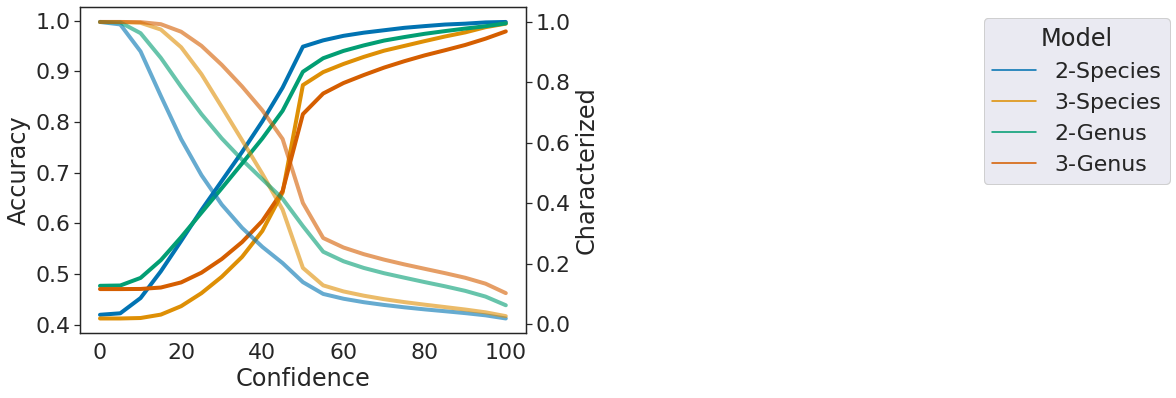

In [52]:
#palette = sns.color_palette("husl", 5)
sns.set_palette("colorblind")
ax1 = sns.set_style(style="white", rc=None )
fig, ax1 = plt.subplots(figsize=(8,6))
sns.lineplot(
    data=base,x="Confidence", y="Accuracy", ax=ax1, hue='Model',markers=True,
    linewidth=4#palette=palette, 
    #size=200
)
ax2 = ax1.twinx()
sns.lineplot(
    data=base,x="Confidence", y="Characterized", ax=ax2, hue='Model',markers=True,
    linewidth=4,alpha=0.6#palette=palette, 
    #size=200
)

sns.set(font_scale=2)
sns.move_legend(ax1, "upper left", bbox_to_anchor=(2, 1))
sns.move_legend(ax2, "upper left", bbox_to_anchor=(2, 1))

In [100]:
roc = pd.read_csv("/global/cfs/cdirs/kbase/KE-Catboost/HK/Deepmicrobes/ROC.csv")
roc = roc.fillna(0)

In [101]:
tpr = roc[roc.metric=='TPR']
prec = roc[roc.metric=='Precision']
rec = roc[roc.metric=='Recall']
rec = pd.concat([prec,rec])
tpr = pd.melt(roc, id_vars=['metric','confidence'])

,metric,confidence,variable,value
0,total_counts_even_False,0,1,41541.0
1,TP,0,1,34887.0
2,FN,0,1,8818.0
3,FP,0,1,6654.0
4,TN,0,1,282761.0
...,...,...,...,...
81355,TN,95,452,333119.0
81356,Precision,95,452,0.0
81357,Recall,95,452,0.0
81358,TPR,95,452,0.0


In [116]:
tpr_ = tpr[tpr.metric=='TPR']
fpr = tpr[tpr.metric=='FPR']
#tpr_.columns=['x','confidence','variable','TPR']
#fpr.columns=['y','confidence','variable','FPR']
#fpr = fpr[['confidence','value']]
fpr=fpr[['confidence','value']].groupby('confidence').mean().reset_index()
tpr_=tpr_[['confidence','value']].groupby('confidence').mean().reset_index()
tpr_.columns = ['confidence','TPR']
fpr.columns = ['confidence','FPR']
fpr = fpr.merge(tpr_)

In [117]:
fpr

,confidence,FPR,TPR
0,0,0.001144,0.001086
1,5,0.001141,0.001086
2,10,0.001069,0.001079
3,15,0.000911,0.001058
4,20,0.000735,0.001023
5,25,0.000578,0.000982
6,30,0.000447,0.000936
7,35,0.000338,0.000889
8,40,0.000246,0.000837
9,45,0.000164,0.000777


<AxesSubplot:xlabel='FPR', ylabel='TPR'>

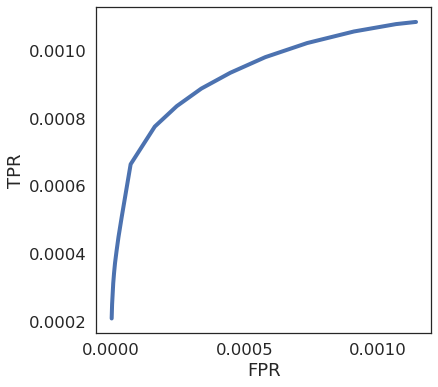

In [129]:
fig, ax1 = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.7)
sns.set_style("white")
sns.lineplot(
    data=fpr,x="FPR", y="TPR", linewidth=4,ax=ax1)

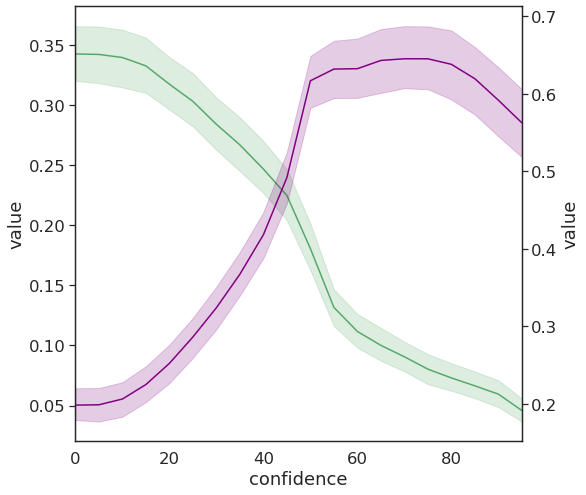

In [128]:
prec = tpr[tpr.metric=='Precision']
rec = tpr[tpr.metric=='Recall']

ax1 = sns.set_style(style=None, rc=None )
fig, ax1 = plt.subplots(figsize=(8,8))
sns.lineplot(
    data=rec,x="confidence", y="value", ax=ax1, color='g')
ax2 = ax1.twinx()

sns.lineplot(
    data=prec,x="confidence", y="value", ax=ax2, color='purple')
ax1.set_xlim(0, 95)
ax2.set_xlim(0, 95)
#sns.set(font_scale=2)
sns.set_style("white")

In [23]:
p.columns = ['tax_id','confidence']
p.merge(base, on='tax_id', how='left')

,tax_id,confidence,tax_name
0,637,18.32,Psychroflexus torquis
1,315,5.17,Kosmotoga olearia
2,40,18.66,Alteromonas australica
3,247,15.89,Halarcobacter bivalviorum
4,752,15.71,Siansivirga zeaxanthinifaciens
...,...,...,...
15345587,117,9.50,Clostridium botulinum_B
15345588,283,9.12,Hydrocarboniclastica marina
15345589,566,26.64,Poseidonibacter peruensis
15345590,72,18.63,Bacillus subtilis


In [31]:
child.replace(".speciestest.result.txt", ".deepmicrobes.csv")

'SRR12480287.deepmicrobes.csv'

In [32]:
main_dir = '/global/cfs/cdirs/kbase/KE-Catboost/HK/Deepmicrobes/'
output='out_'
parent_list = os.listdir(main_dir)

for child in parent_list:
    if '.result.txt' in child:
        print(child)
        p = pd.read_csv(os.path.join(main_dir,child), delimiter='\t',header=None)
        #print(p.head())
        p.columns = ['tax_id','confidence']
        p=p.merge(base, on='tax_id', how='left')
        out = 'out_' + child.replace(".speciestest.result.txt", ".deepmicrobes.csv")
        p.to_csv(os.path.join(main_dir,out))

SRR12480287.speciestest.result.txt
SRR12480286.speciestest.result.txt
SRR12480227.speciestest.result.txt
SRR12480255.speciestest.result.txt
SRR12480288.speciestest.result.txt
SRR12480254.speciestest.result.txt
SRR12480285.speciestest.result.txt
SRR12480163.speciestest.result.txt
SRR12480289.speciestest.result.txt
SRR12480226.speciestest.result.txt
SRR12479649.speciestest.result.txt
SRR12480253.speciestest.result.txt


In [33]:
p

,tax_id,confidence,tax_name
0,466,36.94,Nitrosarchaeum limnae
1,466,28.55,Nitrosarchaeum limnae
2,539,10.34,Persicimonas caeni
3,352,9.84,Maribacter cobaltidurans
4,244,7.14,Halanaeroarchaeum sulfurireducens
...,...,...,...
13351758,876,25.56,Vesicomyosocius okutanii
13351759,437,25.69,Moanabacter tarae
13351760,197,10.56,Exiguobacterium mexicanum
13351761,21,14.49,Alcanivorax borkumensis
